House Price Prediction

In [ ]:
import numpy as np
import pandas as pd

# import os  #The os module is a built-in Python library that allows you to interact with your Operating System. It lets you do things like create folders, delete files, and—in this case—navigate through directories.
# for dirname,_,filenames in os.walk('kaggle/input'): #os.walk is a "generator" that travels through a folder tree
#   for file in filenames:
#     print(os.path.join(dirname,filenames)) #This intelligently glues the folder path and the file name together.

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from scipy import stats
#SciPy is a library for scientific computing. The stats module is the "Swiss Army Knife" of statistics in Python.
#use this to perform tasks like calculating Z-scores, running T-tests, or checking if your data follows a "Normal Distribution" (the bell curve).
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action="ignore")

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#Splitting the Data
#train_test_split: Training Set: Used to "teach" the model.Test Set: Used as a "final exam" to see how the model performs on data it has never seen before.
#2. Validation TechniquesKFold: This is a strategy for splitting data. Instead of just one split, it divides your data into $K$ equal parts (folds). It trains the model $K$ times, each time using a different fold as the test set and the rest as training.
#cross_val_score: This automates the KFold process. It runs the model multiple times and gives you a list of scores. If the scores are all similar, your model is stable. If they vary wildly, your model is unreliable.
#(Tuning)
#Hyperparameters the tools help you find the perfect settings:
#GridSearchCV: This is the "Exhaustive Search." You give it a list of values for every knob, and it tries every single possible combination. It is very thorough but can be very slow.
#RandomizedSearchCV: This is the "Budget Search." Instead of trying every combination, it picks a random sample of combinations. It’s much faster and often finds a result that is just as good as the grid search.

import math #Python’s standard library for mathematical functions.
import sklearn.model_selection as ms  #Instead of typing the long name sklearn.model_selection, you can just type ms.
import sklearn.metrics as sklm

In [ ]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

dftrain=train.drop(['Id'],axis=1) #inplace=True, Modify the original or you are telling pandas: "Modify the existing DataFrame directly. Do not create a new one
dftest=test.drop(['Id'],axis=1) #inplace=False: Create a new copy of the data without that column or The function returns a new version of the DataFrame.

#print(f"no.of columns in train dataset is {train.shape[1]} and no.of rows is {train.shape[0]}")
# print(f"no.of columns in test dataset is {test.shape[1]} and no.of rows is {test.shape[0]}")

sales price future analysis

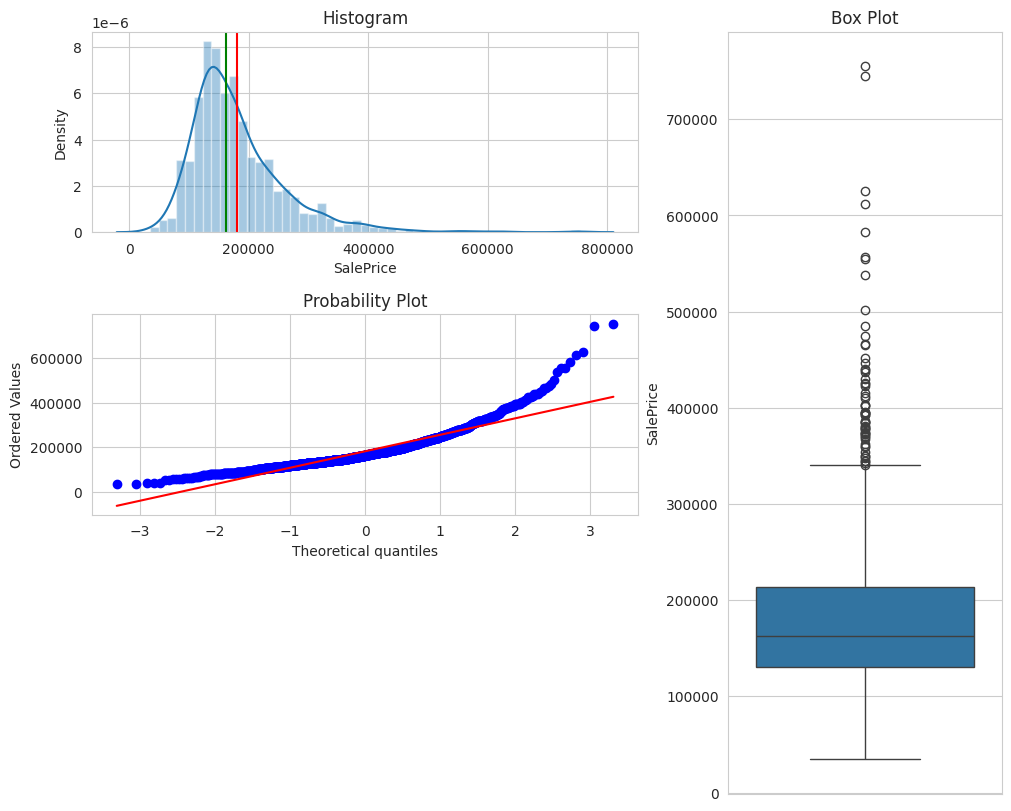

In [ ]:
def three_plots(df,feature):
  fig=plt.figure(constrained_layout=True,figsize=(10,8)) #constrained_layout = True is like an "Auto-Layout"
#solves: Overlapping Labels: It prevents the x-axis label of a top plot from crashing into the title of the plot below it.
#Legend Clipping: It ensures that legends or colorbars don't get pushed off the edge of the "paper."
#Margin Management: It calculates exactly how much room is needed for the text around the plots and shrinks the plots just enough to make space.
  grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
  ax1=fig.add_subplot(grid[0,:2])
  ax1.set_title("Histogram")
  sns.distplot(df.loc[:,feature],norm_hist= True,ax=ax1) #sns.distplot()This Seaborn function that draws a Distribution Plot.
  #df.loc[:, feature]: This selects the specific column (like 'SalePrice') from your data
  #norm_hist=True "normalizes" the chart so that the total area under the bars equals 1. This turns your count of houses into a Probability Density
  #ax=ax1 draw it inside the ax1 slot we created in the GridSpec layout.
  plt.axvline(x=df[feature].mean(),c='red')
  plt.axvline(x=df[feature].median(),c="green")

  ax2=fig.add_subplot(grid[1,:2])
  ax2.set_title("Q-Q Plot (Quantile-Quantile Plot)") #Does my data follow a Normal Distribution (a Bell Curve)?"
  stats.probplot(df.loc[:,feature],plot=ax2)  #df.loc[row_label,column_label],  [:,feature] this means telling Pandas to select every single row in the dataset

  ## Customizing the Box Plot.
  ax3 = fig.add_subplot(grid[:, 2])
  ## Set title.
  ax3.set_title('Box Plot')
  sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
three_plots(dftrain, 'SalePrice')


Red line in histogram indicates the mean of the SalePrice and the Green line indicates the median

From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

In [ ]:
from scipy.stats import skew #Skewness measures the symmetry of your data distribution. Normal Distribution (Skew = 0): The data is a perfect bell curve.
print("Skewness of the SalesPrice is", dftrain['SalePrice'].skew())
#Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. Here we can observe that the value of skewness is quite high which means that there is a large amount of asymmetry.
#The peak of the histogram represents the mode i.e the price for which maximum number of houses were sold.
#What kind of skewness is present in the given case?
#As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.


Skewness of the SalesPrice is 1.8828757597682129


There is an amazing library called missingno which helps us to visualize the number of Null values present in each feature.

<Axes: >

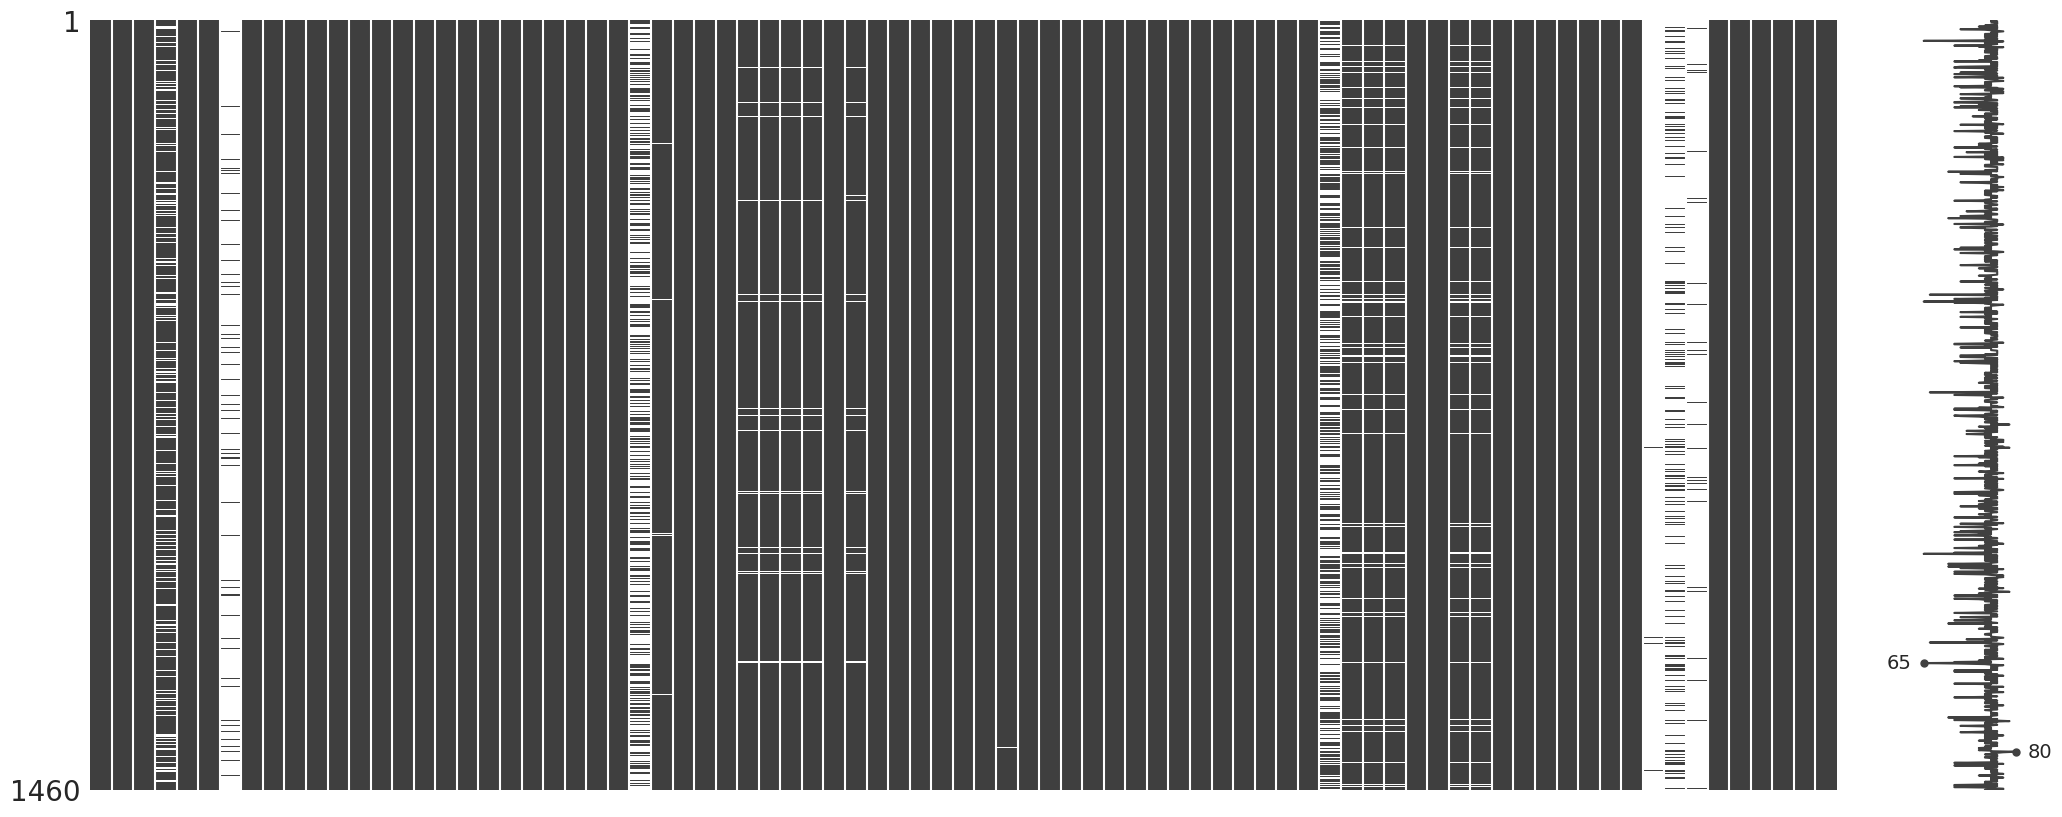

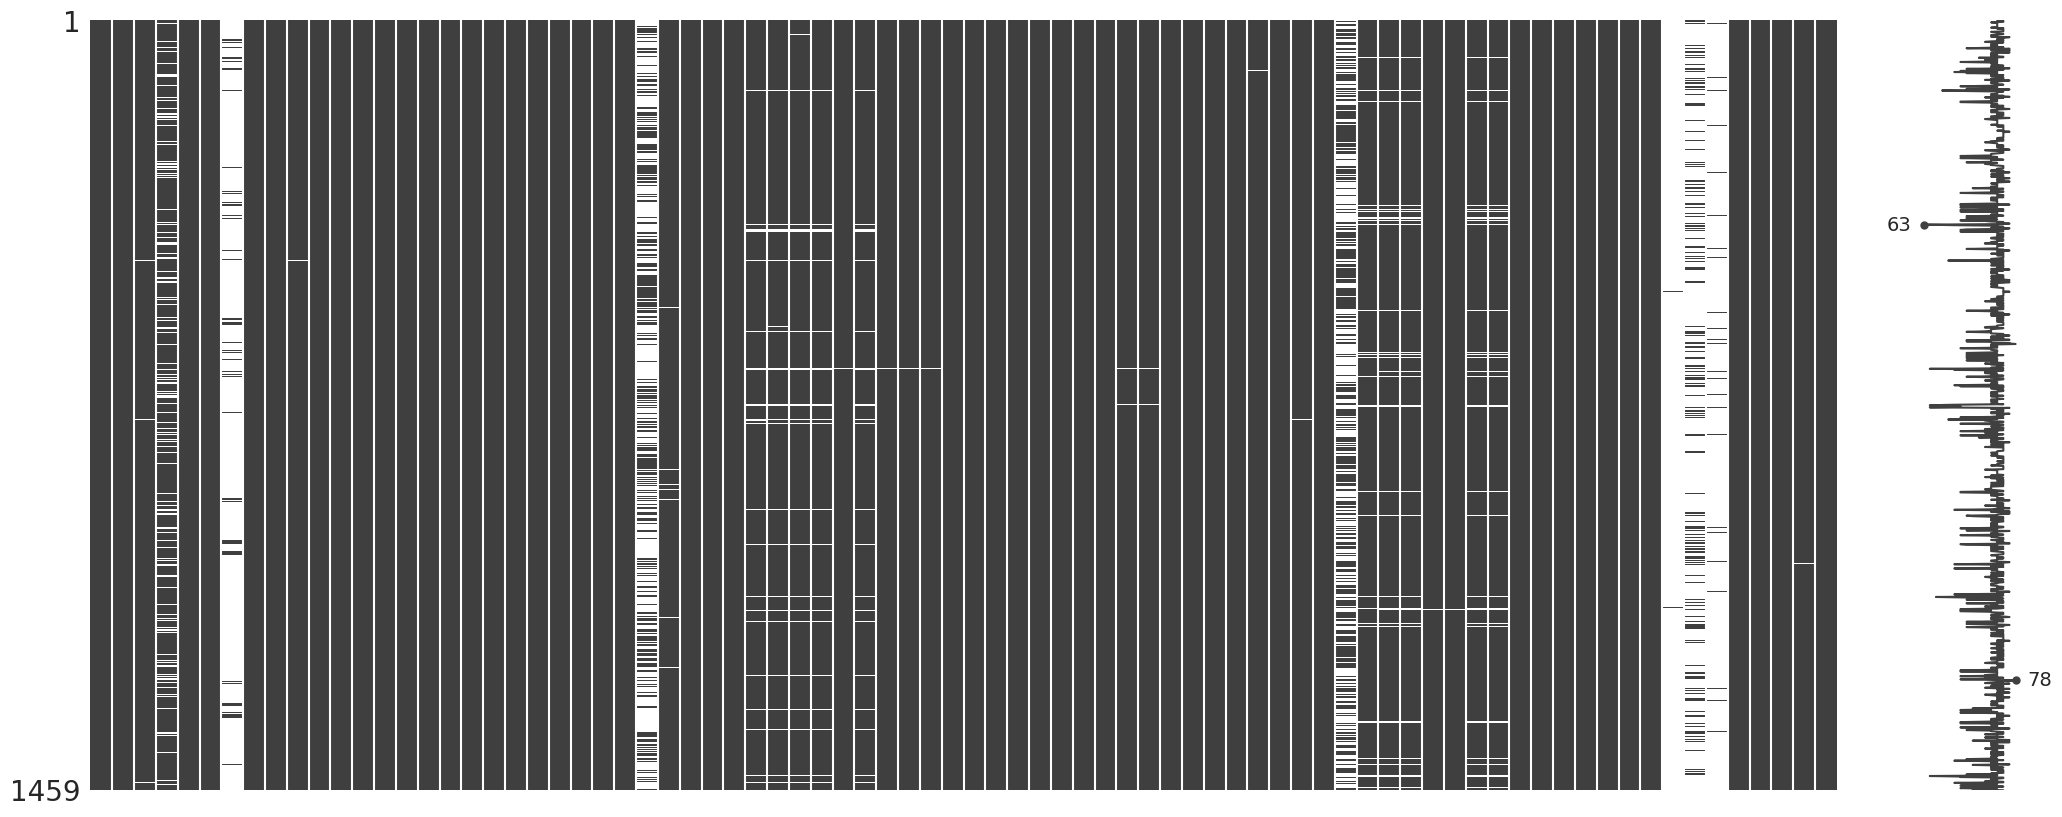

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(train)
msno.matrix(test)
#Dark Bars: Represent where you have actual data.
#White Lines: Represent "Null" or missing values

In [ ]:
def null_table(data):
  """ A function which returns the number and percentage of null values in the given dataset. """
  indices=data.isnull().sum().index #data.isnull(): Goes through every cell in your table and marks it True if it's empty and False if it has data.
  #indices: Stores the names of the columns
  value=data.isnull().sum().values #Stores the count of missing values
  percentages=[]
  for i in indices:
    percentages.append((data[i].isnull().sum()/data[i].shape[0])*100)
  d={'Columns' : indices, 'Count of Null Values' : value, 'Approximate Percentage of Null Values' : percentages}

  null_frame=pd.DataFrame(data=d)
  return (null_frame)
null_train_table=null_table(dftrain)
null_train_table.sort_values(by='Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,81,5.547945
62,GarageQual,81,5.547945
58,GarageYrBlt,81,5.547945
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
24,MasVnrType,872,59.726027
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [ ]:
null_test_table= null_table(dftest)
null_test_table.sort_values(by="Approximate Percentage of Null Values").tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
63,GarageCond,78,5.346127
59,GarageFinish,78,5.346127
62,GarageQual,78,5.346127
2,LotFrontage,227,15.558602
56,FireplaceQu,730,50.034270
24,MasVnrType,894,61.274846
72,Fence,1169,80.123372
5,Alley,1352,92.666210
73,MiscFeature,1408,96.504455
71,PoolQC,1456,99.794380


This code is a crucial part of the Data Preprocessing stage. In Machine Learning, we often combine the Training and Testing datasets into one "Total" dataset before cleaning. This ensures that any transformations (like filling missing values or converting text to numbers) are applied identically to both sets.

In [ ]:
na=dftrain.shape[0]
nb=dftest.shape[0]
y_train=dftrain['SalePrice'].to_frame() #.to_frame(): This converts the single column (a Series) into a DataFrame.
total=pd.concat((dftrain,dftest),sort=False).reset_index(drop=True)  #pd.concat: This "stacks" the test set directly underneath the training set
#sort = False: This prevents Pandas from alphabetically rearranging your columns during the merge.
#.reset_index(drop = True): When you stack them, the index usually restarts (e.g., it goes from 0–1460, then starts at 0 again). This command creates a fresh, continuous index from 0 to the very end.
total.drop(['SalePrice'],axis=1,inplace=True)
print(f'total size is{total.shape}')

total size is(2919, 79)


In [ ]:
#This function, msv_1 (likely standing for Missing Service Values), is a high-quality visualization tool.
#It doesn't just list missing data; it creates a threshold bar chart to help you instantly decide which columns to keep and which to delete

def msv_1(data,thresh=20,height=3,width=10,color='black',edgecolor='black'): #The Decision Line (The Threshold)=thresh
#it's set to 20%. Why it matters: In data science, 20% is a common "danger zone." If a column is missing more than 20% of its data, it is often considered too "holey" to be useful, and you might decide to drop it.
  plt.figure(figsize=(width,height))
  percentage=(data.isnull().mean())*100
  percentage.sort_values(ascending=False).plot.bar(color=color,edgecolor=edgecolor) #sort_values(ascending=False): This ensures the columns with the most missing data appear first (on the left).
   #Axis Horizontal Line
  plt.axhline(y=thresh,c='r',linestyle=':') #y: The vertical position where the line sits
  plt.title("Missing values percentage per column",weight='bold',fontsize=20)
  plt.text(len(data.isnull().sum()/len(data))/1.7,thresh+12.5,f"column with more than {thresh}% missing values", fontsize=10,color="crimson",ha="left", va="top",bbox=dict(facecolor='white', edgecolor='crimson', boxstyle='round,pad=0.5', alpha=0.8))
  #len(data.isnull().sum()/len(data)): This is just a long way of saying "count the number of columns in my chart."/1.7: This divides that count to place the text roughly 60% of the way across the chart (to the right side).
  #thresh: This is your red line (e.g., 20%).+ 12.5: This lifts the text slightly above the red line so it doesn't touch it.
  #Horizontal Alignment(ha) and vertical alignment (va)

  plt.text(len(data.isnull().sum()/len(data))/1.7,thresh-5,f"column with less than{thresh}% missing values", fontsize=10,color="green",ha="left",va="top")
  plt.xlabel("Columns",weight="bold",size=10)
  plt.ylabel("missing value percentage")
  plt.yticks(weight ='bold')
 #plt.tick_params(axis='y', labelweight='bold', labelsize=12, labelcolor='darkslategray') # Changed plt.ytick to plt.tick_params
  return plt.show()

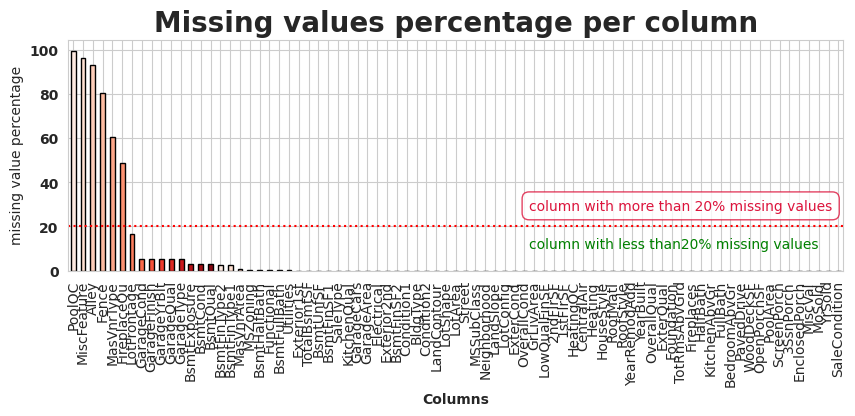

In [ ]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

Numerical and Categorical Variables

In [ ]:
category_var=dftrain.select_dtypes(include="object")  #include = 'object': In Pandas, columns containing text strings or mixed data are stored as Objects
#select_dtypes: This is a built-in Pandas filter that looks at the "Dtype" (Data Type) of every column.
num_var=dftrain.select_dtypes(exclude="object") #exclude = 'object': This tells Pandas to grab everything except the text columns.
print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  43
Number of numerical features are:  37


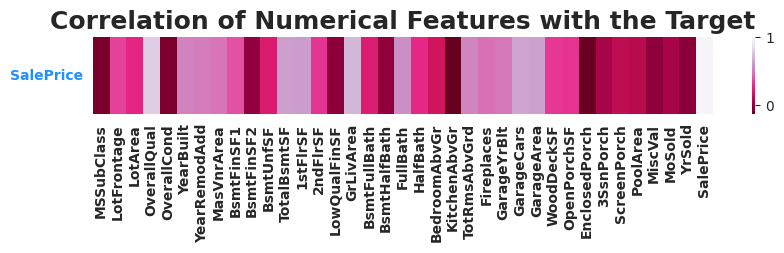

In [ ]:
#correlation of the numerical features with the target variable
corr_num=num_var.corr()
f,ax=plt.subplots(figsize=(10,1))
sns.heatmap(corr_num.sort_values(by=['SalePrice'],ascending=False).head(1),cmap="PuRd_r")
plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()


In [ ]:
correlation=num_var.corr()["SalePrice"].sort_values(ascending=False).to_frame().head(10)
cmap=sns.light_palette("cyan",as_cmap=True)
#sns.light_palette("cyan"): This creates a range of colors starting from a very pale, almost white color and ending at a vibrant Cyan.
#as_cmap = True: This tells Seaborn to create a "Colormap" object that can be applied to every cell in a table based on its numerical value.

#While sns.heatmap is great for quick glances, using .style.background_gradient:
#Keeps the Numbers Readable: You can clearly see the exact correlation values (e.g., 0.79, 0.70) while still getting the visual "heat" of the color.
saleprice_correlation=correlation.style.background_gradient(cmap=cmap)
saleprice_correlation

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
# 1. We use the 's' object (your styled correlation table)
# 2. We add the .bar() method
s = correlation.style.background_gradient(cmap = cmap).bar(color='cyan', subset=['SalePrice'])
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
s = (correlation.style
     .background_gradient(cmap=cmap)
     .bar(color='cyan', subset=['SalePrice'])
     .format("{:.2f}")) # Rounds everything to 2 decimal places
s

,SalePrice
SalePrice,1.00
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52


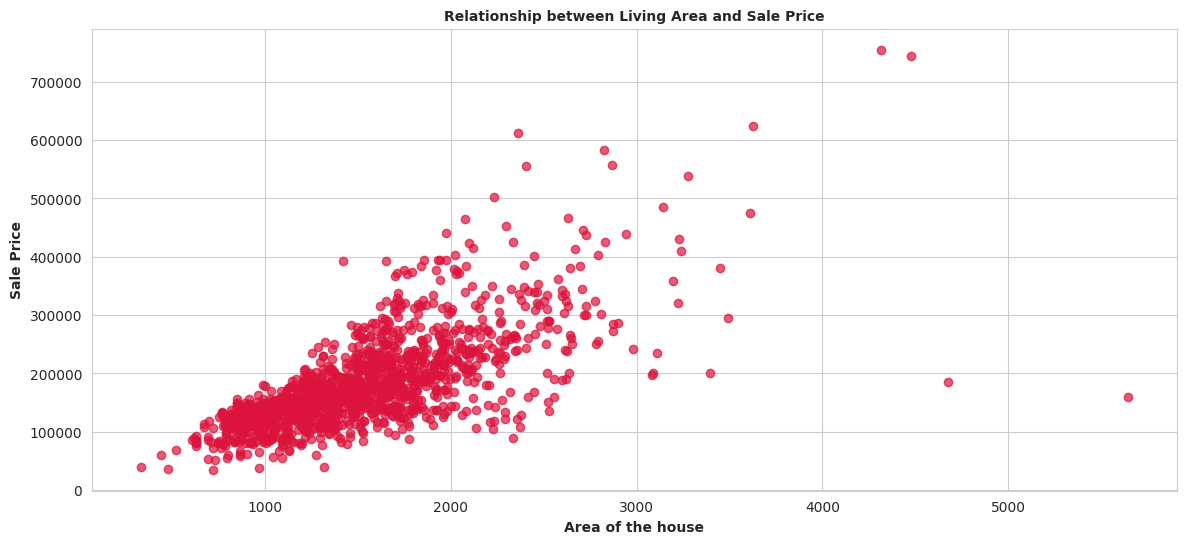

In [ ]:
plt.figure(figsize = ((14, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = dftrain, color='crimson', alpha=0.7)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

We can observe that there is almost a linear relationship between Living Area and the Sale Price. If the area is huge then price should also have also been high but the two rightmost points suggest something else. These two points are outliers. We will drop both of them below.

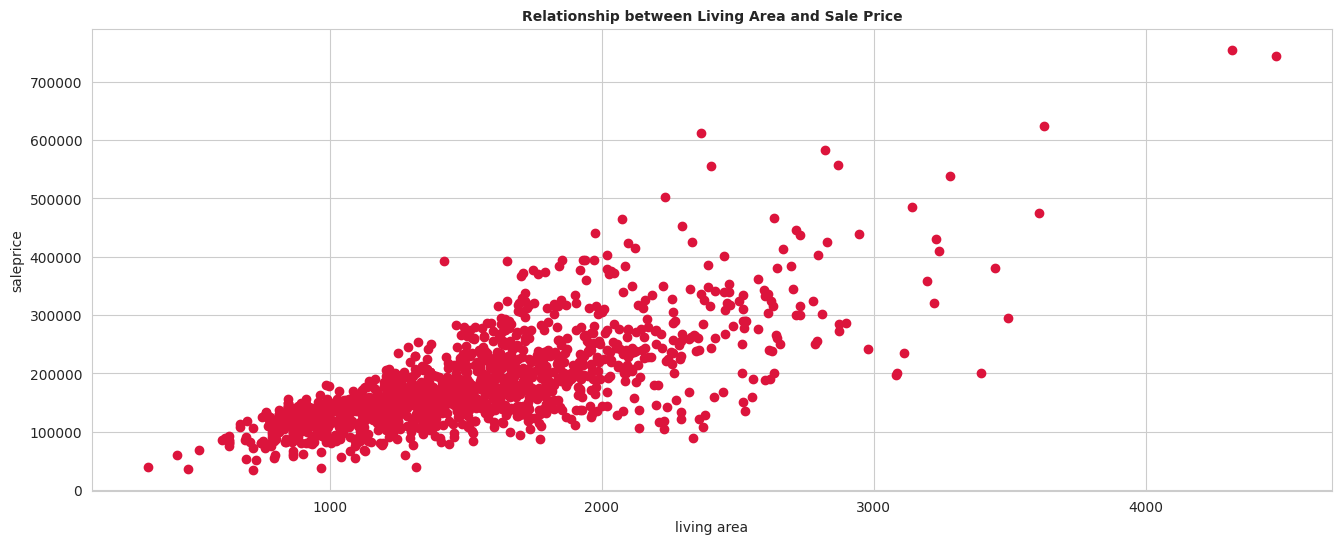

In [ ]:
train=dftrain[dftrain['GrLivArea']<4500]
plt.figure(figsize=(16,6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice',data=train,color="crimson",alpha=1)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.ylabel("saleprice")
plt.xlabel("living area")
plt.show()

We can observe that those two values have been successfully dropped.

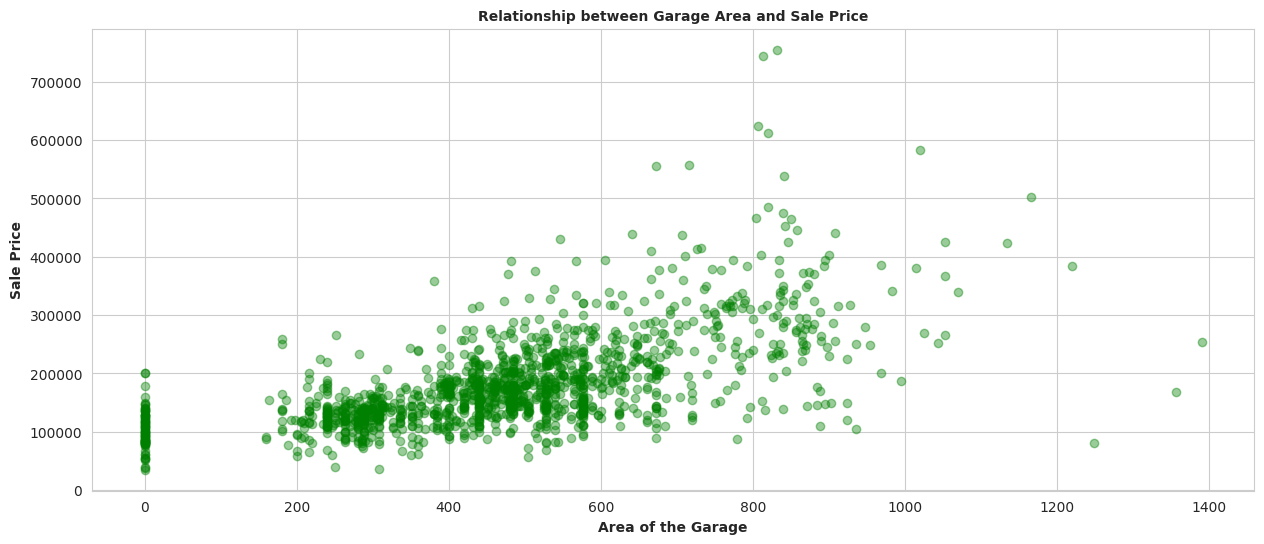

In [ ]:
#garage area
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = train, color='green', alpha=0.4)
plt.title('Relationship between Garage Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the Garage', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

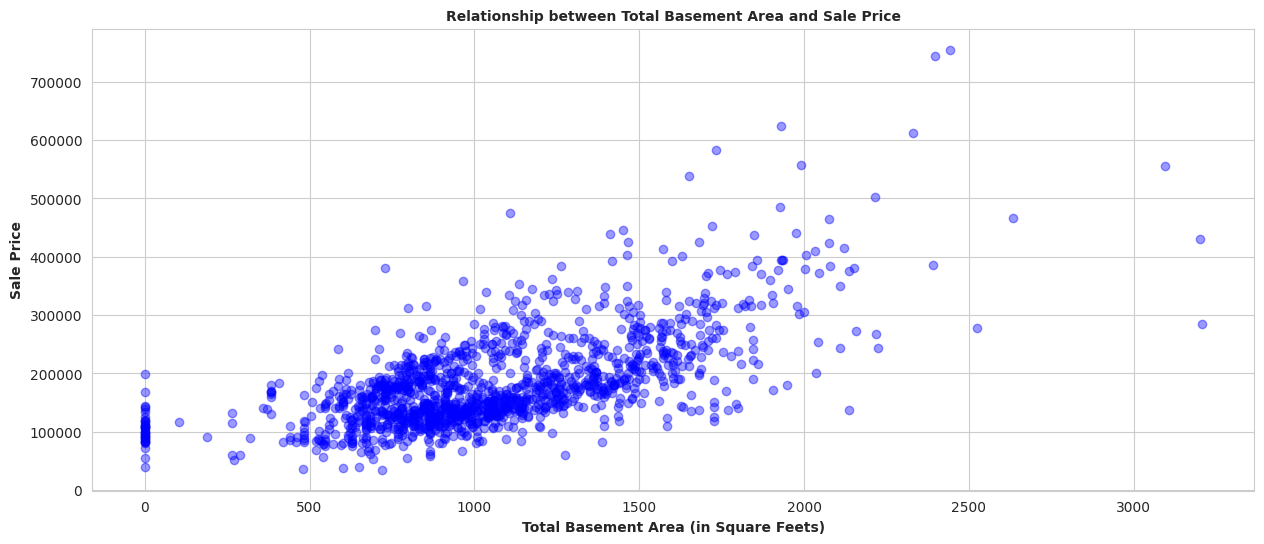

In [ ]:
# Total basement area
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = train, color = 'blue', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area (in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

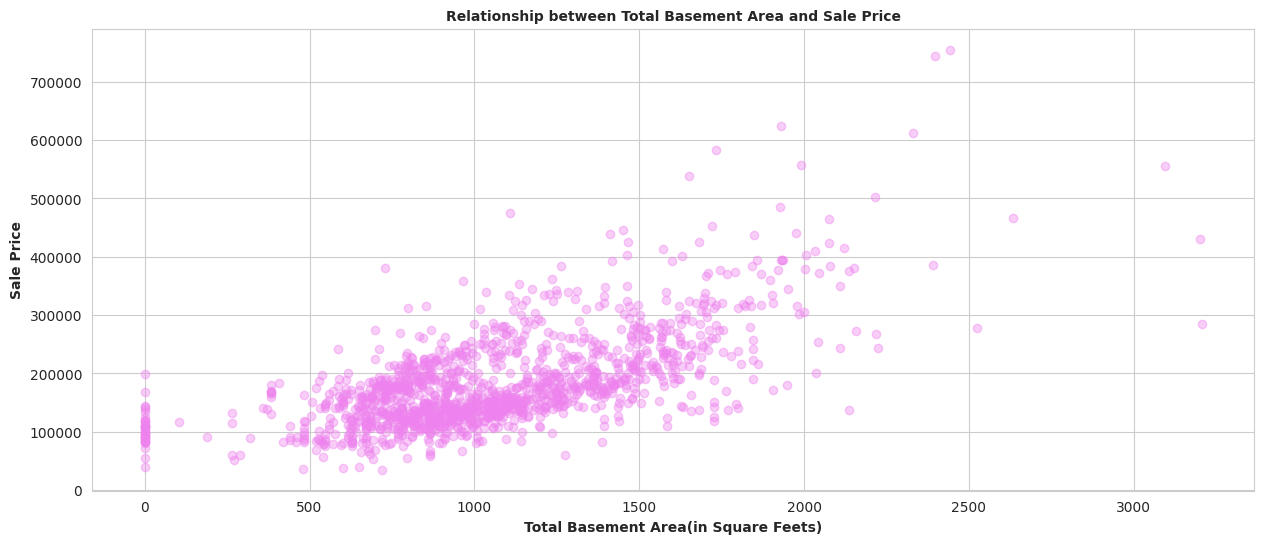

In [ ]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = train, color = 'violet', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area(in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

Before we move forward we need to understand the assumptions of linear regression:

Linearity
Homoscedasticity
No or little Multicollinearity
Independence of Error

Since we fit a linear model, we assume that the relationship is linear, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the dependent variable doesn't increase as the value of the independent increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

In order to discover the linearity let's plot scatter plots for GrLivArea and MasVnrArea

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

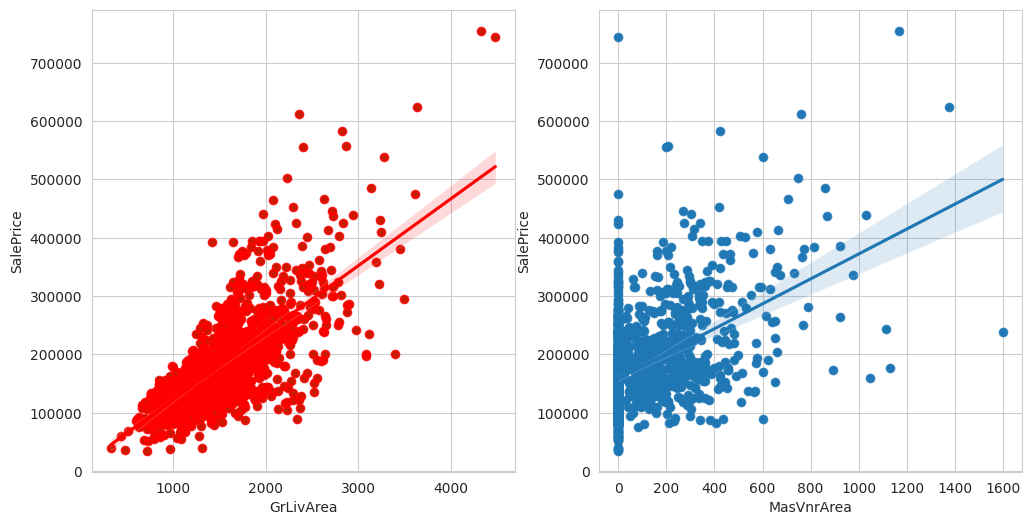

In [ ]:
## Scatter plotting for SalePrice and GrLivArea.
fig,(ax1,ax2)=plt.subplots(figsize=(12,6),ncols=2,sharey=False)
#sharey = False tells Matplotlib that each plot should have its own independent vertical scale

sns.scatterplot(x=train['GrLivArea'], y = train['SalePrice'],ax=ax1, c="green")
sns.regplot(x=train['GrLivArea'], y = train['SalePrice'],ax=ax1, color="red")


sns.scatterplot(x = train['MasVnrArea'], y = train['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice.
sns.regplot(x = train['MasVnrArea'], y = train['SalePrice'], ax=ax2)

We can observe that the relationship between Sales Price and GrLivArea is much more linear than the relationship between Sales Price and MasVnrArea.

Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice.

A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

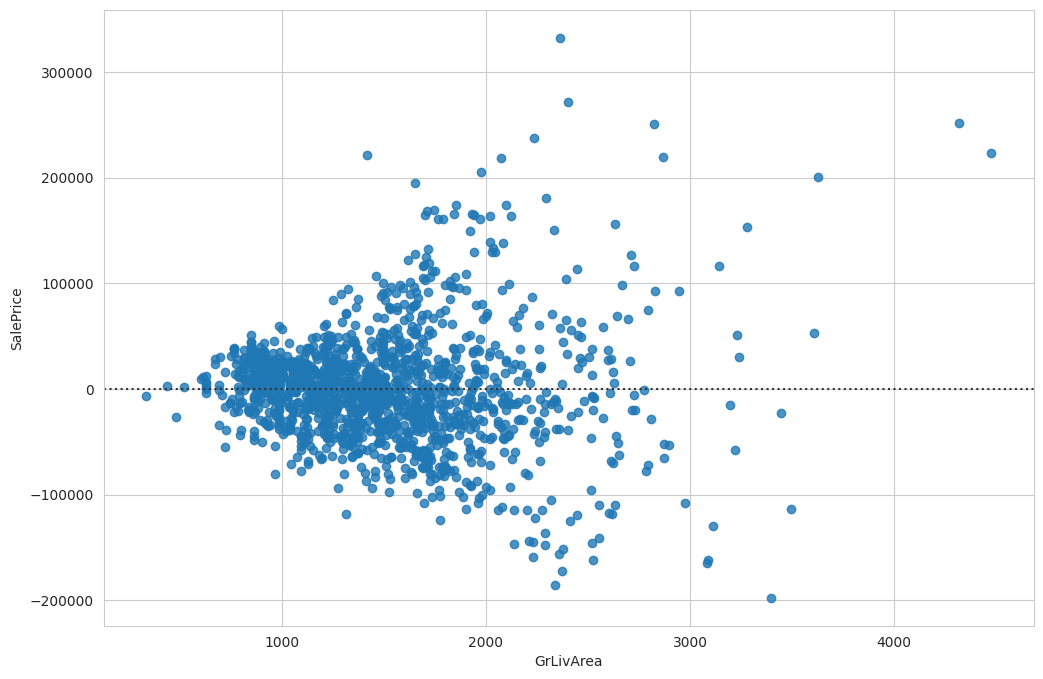

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(x=train['GrLivArea'], y=train['SalePrice'])

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel.

The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed.

Let's plot the three graphs again for the target feature.

Now let's make sure that the target variable follows a normal distribution. In order to make a feature follow normal distribution, we will perform log transformation.

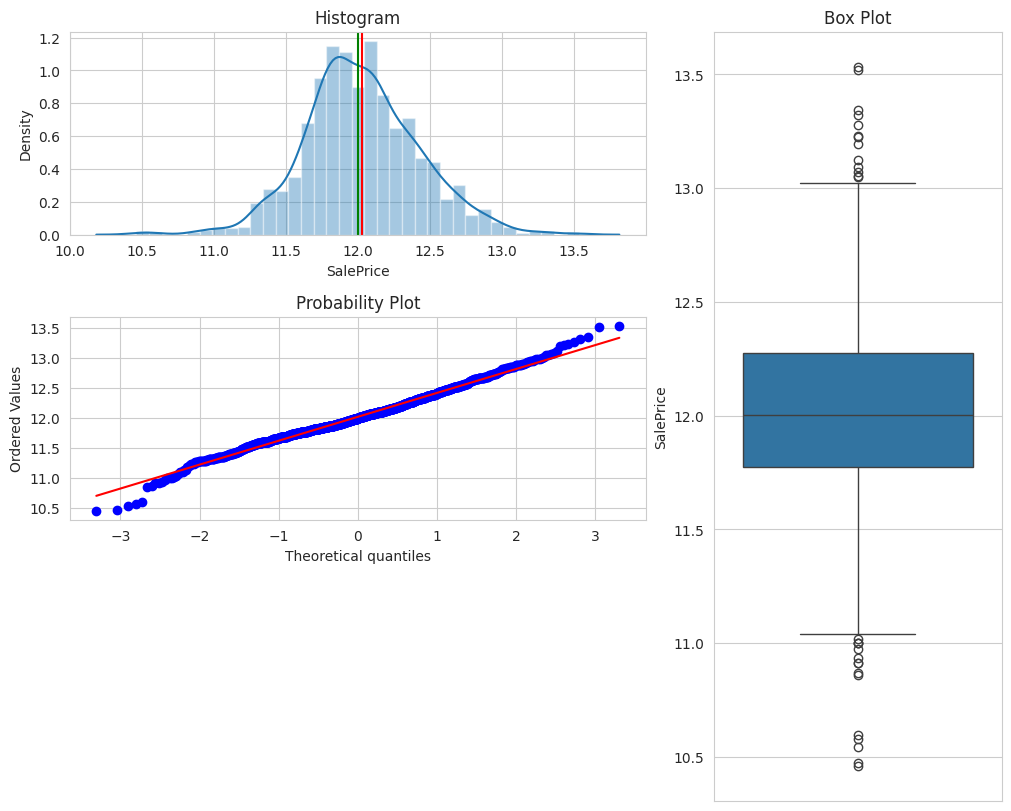

In [ ]:
dftrain['SalePrice']=np.log1p(dftrain['SalePrice'])
#Specifically, log1p calculates $log(1 + x)$
#Why the "1p"? If you have any zeros in your data, a standard $log(0)$ would crash your code (it's mathematically undefined).
#The $+1$ ensures that all values remain positive and calculable.
three_plots(dftrain, 'SalePrice')


We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

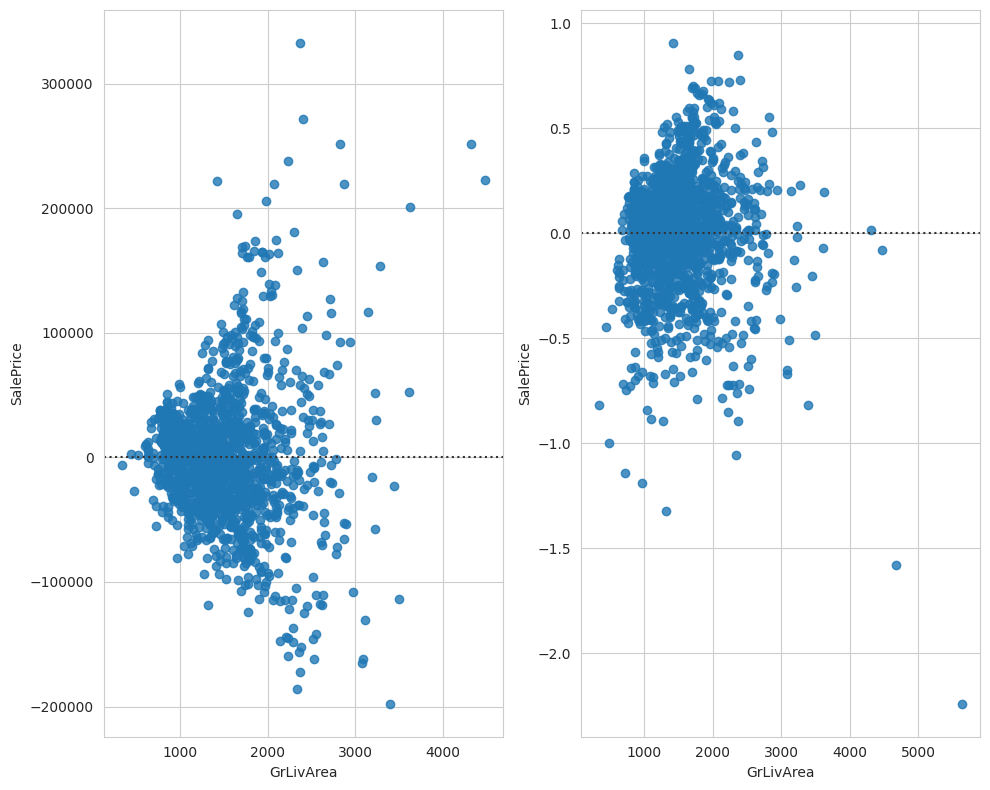

In [ ]:
fig,(ax1,ax2)=plt.subplots(figsize=(10,8),ncols=2,sharey=False,sharex=False)
sns.residplot(x=train['GrLivArea'],y=train['SalePrice'],ax=ax1)
sns.residplot(x=dftrain['GrLivArea'],y=dftrain['SalePrice'],ax=ax2)
plt.tight_layout()

We can see that the scatterplot on the left had heteroscedasticity(funnel like shape) but after applying log transformation to the feature, it was removed and now it's Homoscedastic.

Linear Regression indicates significant relationships between the dependent variable and the independent variable. It assumes that there is a linear relationship between the independent variables and the dependent variable but this is not always the case in real life. There are very less scenarios where this assumption holds true. Multiple Regression also suffers from multi-collinearity, auto-correlation, and heteroskedasticity.

The interpretation of the linear coefficient is that it represents the mean change in the dependent variable for 1 unit change in the independent variable when all the other independent variables are held constant.

Now suppose that there are two correlated independent variables (A and B) and we are aiming to find the right coefficient for these independent variables. When the coefficient for A is calculated, will that coefficient be accurate? No, it won’t be right because changes in A are associated with shifts in B, and as we have already discussed that all the other variables need to be held constant, B can’t be held as a constant because A and B are correlated. This is known as Multicollinearity and it is one of the disadvantages of Linear Regression.

In order to solve this problem, we use various regularization techniques (l1, l2 etc) or other kind of regression techniuques like Elastic Net Regression, Lasso and Ridge Regression which automatically takes care of multicollinearity.

<Figure size 1500x1000 with 0 Axes>

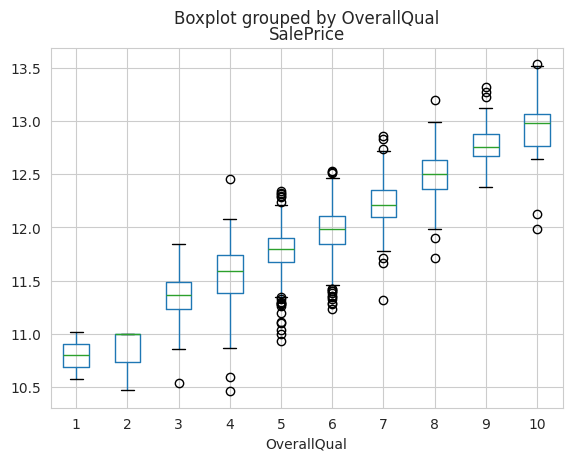

In [ ]:
plt.figure(figsize = ((15, 10)))
dftrain.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

As the quality increases, price of the houses also increase

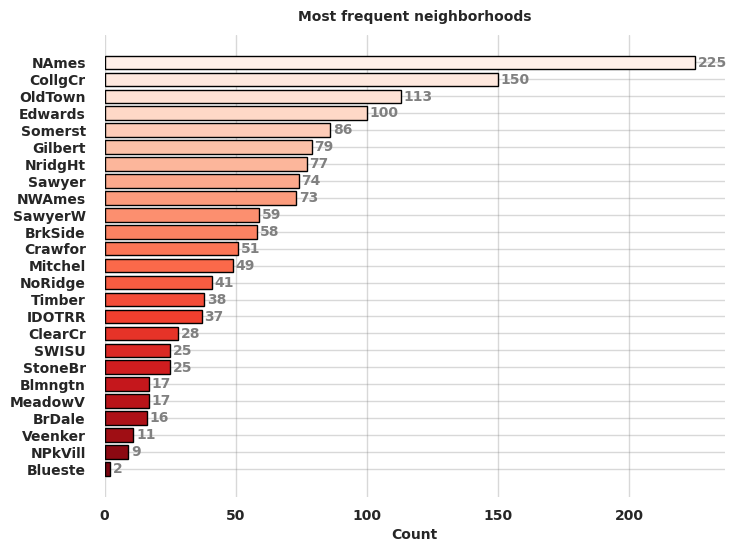

In [ ]:
#Exploring Categorical Variables

#Exploring Categorical Variables
def horizontal_plot(data, column_name, color,plot_title):
    """
    A function that plots a horizontal bar graph for the given column name
    """
    fig,  ax = plt.subplots(figsize = (8,6))
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()
    mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], edgecolor = 'black', color = sns.color_palette(color, len(title_cnt)))
    for s in ['top','bottom','left','right']:
      ax.spines[s].set_visible(False)

     # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    #Adding paddings : Padding = distance between axis and numbers
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    #Adding grid lines for x and y axis
    ax.grid(visible = True, color = 'grey', linewidth = 1, linestyle = '-', alpha = 0.3)

    #show top values
    ax.invert_yaxis() #inverts y axis
    #Set title
    ax.set_title(plot_title, weight = 'bold', loc = 'center', pad = 10, fontsize = 10)
    ax.set_xlabel('Count', weight = 'bold') #Provides name to x axis

    for i in ax.patches:
      ax.text(i.get_width()+1, i.get_y()+i.get_height()/2, str(round(i.get_width(), 2)), fontsize = 10, fontweight = 'bold', color = 'grey', va = 'center' )

    plt.yticks(weight = 'bold')
    plt.xticks(weight = 'bold')

    plt.show()

horizontal_plot(dftrain, 'Neighborhood', 'Reds', 'Most frequent neighborhoods')

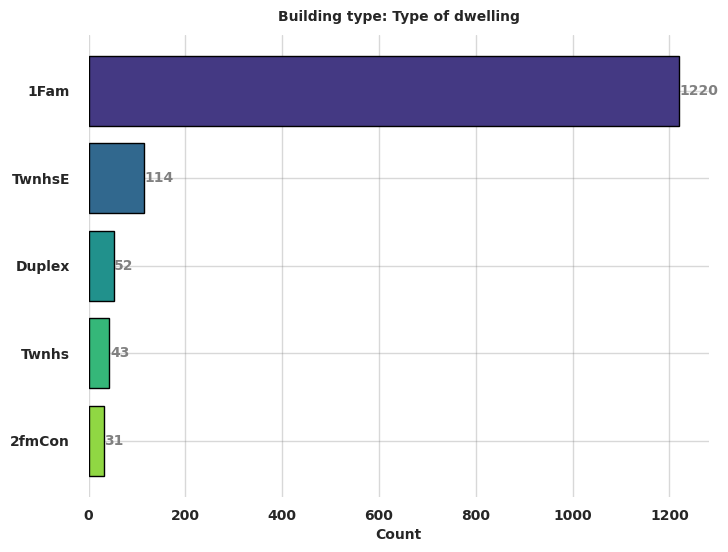

In [ ]:
horizontal_plot(dftrain, 'BldgType', 'viridis', 'Building type: Type of dwelling')

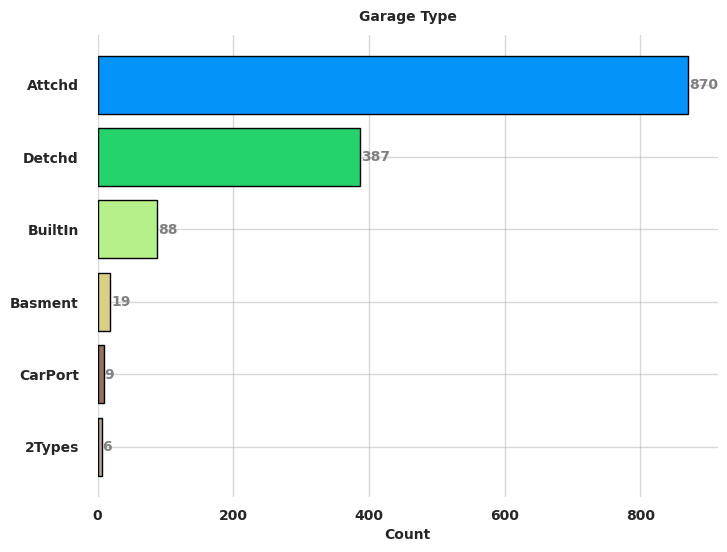

In [ ]:
horizontal_plot(dftrain, 'GarageType', 'terrain', 'Garage Type')

Feature Engineering

In [ ]:
y=dftrain['SalePrice'].reset_index(drop=True)    #With drop = True: Pandas simply deletes the old index and replaces it with a fresh start (0, 1, 2, 3...) without adding any extra columns.
train_feature=dftrain.drop("SalePrice",axis=1)
test_feature=test.copy()

features=pd.concat((train_feature,test_feature)).reset_index(drop=True)
features.shape


(2919, 80)

Some of the variables given in the description should be of string data type but instead they are stored as numerical data type. First let's change them into string data type

In [ ]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
print(features.dtypes)

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
Id               float64
Length: 80, dtype: object


In [ ]:
null_table(features).sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,159,5.447071
62,GarageQual,159,5.447071
2,LotFrontage,486,16.649538
56,FireplaceQu,1420,48.646797
79,Id,1460,50.017129
24,MasVnrType,1766,60.500171
72,Fence,2348,80.438506
5,Alley,2721,93.216855
73,MiscFeature,2814,96.402878
71,PoolQC,2909,99.657417


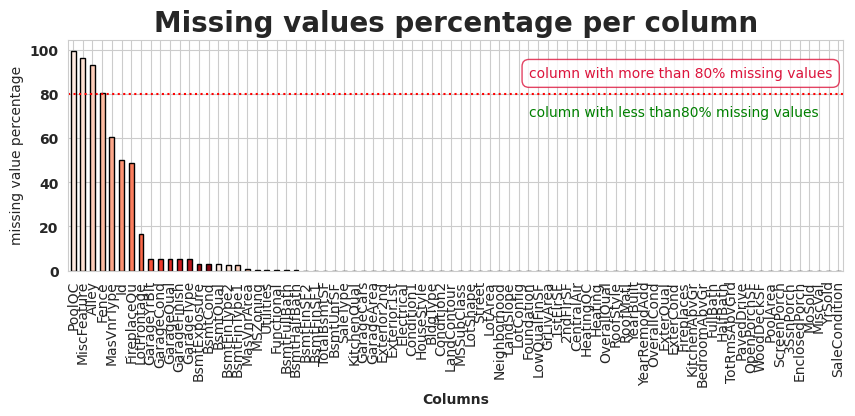

In [ ]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

We can see that there are 4 features having more than 80% missing values. We will drop these 4 features.

In [ ]:
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
features.shape

(2919, 76)

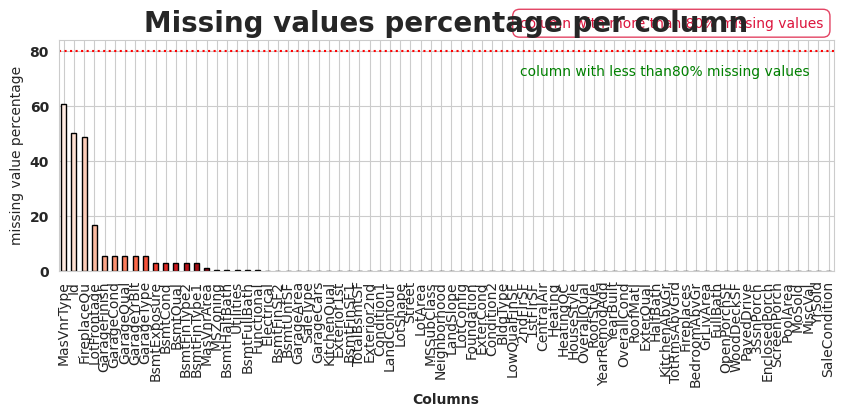

In [ ]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

Now none of the features have above 80% missing values.

We must observe here that NA has a different meaning. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why wee need to take into account these values as it can affect the final prices of the house.

I have identified some of the features which have NA as a category, they are listed in form of a list below. We will replace these null values with None.

Reading through the description of the features is very important, otherwise the above points can't be concluded

In [ ]:
description = open("data_description.txt", "r")
#print(description.read())

In [ ]:
def fills_null(features):
    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'
    features['Functional'] = features['Functional'].fillna('Typ')
    #Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0]) #Simple Mode Imputation (The "Most Frequent" Logic)
    #mode()[0]: The mode is the value that appears most often in a column.

    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])

    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

    #Contextual Imputation (The "Smart" Logic)
    #This is the most advanced part of the function. It assumes that a value isn't just random, but depends on other features.
    # In order to fill the null values for MSZoing, we will take into account the MSSubClass featue.
    # We are doing so because the type of dwelling in a given area largely affects the zone of the area
    features['MSZoning']=features.groupby('MSSubClass')['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))
    # In order to fill the null values for LotFrontage(Linear feet of street connected to property)
    # we will fill it with median of the values grouped by Neighborhood.
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    # As mentioned before that the 'NA' value in many columns represent the absence of that feature for
    # a particular house, we will replace those null values with None.
    # 'None' for categorical feature and 0 for numerical feature.
    cat_features=features.select_dtypes(include='object').columns
    num_features=features.select_dtypes(exclude='object').columns
    features[cat_features]=features[cat_features].fillna('None')
    features[num_features]=features[num_features].fillna(0)

    return features

features = fills_null(features)
features.shape

(2919, 76)

In [ ]:
features.isnull().sum().sum()

np.int64(0)

Now there are 0 null values in the given dataset

Now let's create some new features.

In [ ]:
def new_features(features):
  features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
  features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
  features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
  features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
  features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    # Adding total sqfootage features
    # In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.
  features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
  # Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
  # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.

  features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

  features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])
  # Add years since remodel
  features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

  return features

features = new_features(features)
features.shape

(2919, 85)

In [ ]:
num_features=features.select_dtypes(exclude='object').columns
skew_features=features[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skew=pd.DataFrame({'skewed value':skew_features})
skew.head()


,skewed value
MiscVal,21.958480
PoolArea,16.907017
HasPool,14.891972
LotArea,12.829025
LowQualFinSF,12.094977


In [ ]:
cmap = sns.light_palette("red", as_cmap=True)
styled_skew = skew.style.background_gradient(cmap=cmap).set_table_styles([
    {'selector': 'th.col_heading', 'props': [('font-weight', 'bold')]}
])

styled_skew

,skewed value
MiscVal,21.958480
PoolArea,16.907017
HasPool,14.891972
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723


There's is quite a lot of asymmetry in the above features. We will need to fix the skewness

In [ ]:
def fix_skew(features):
  from scipy.special import boxcox1p
  from scipy.stats import boxcox_normmax
  numerical_columns=features.select_dtypes(exclude="object").columns
  # Check the skew of all numerical features
  skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
  high_skew=skewed_features[(skewed_features)>0.5]
  skewed_features=high_skew.index
  #box cox transformation
  for column in skewed_features:
    try:
        # Attempt to find the optimal lambda for Box-Cox transformation
        lambda_val = boxcox_normmax(features[column] + 1)
        features[column] = boxcox1p(features[column], lambda_val)
    except Exception as e:
        # If boxcox_normmax fails, default to log1p transformation (lambda=0)
        print(f"Warning: boxcox_normmax failed for column '{column}'. Applying log1p instead. Error: {e}")
        features[column] = np.log1p(features[column])
  return features

features=fix_skew(features)
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Id,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,60,RL,14.663551,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1,1,1,0,22.970609,3.5,12.335086,5
1,20,RL,16.494888,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0,1,1,1,22.864282,2.5,0.000000,31
2,60,RL,15.044952,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1,1,1,1,23.315715,3.5,10.087679,6
3,70,RL,14.008495,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,1,1,1,1,22.733344,2.0,28.151353,36
4,60,RL,16.954473,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,1,1,1,1,24.733055,3.5,14.600892,8


One-Hot Encoding, which is the process of converting text (Categorical data) into numbers (Binary data) so that a Machine Learning model can actually read it.

In [ ]:
features=pd.get_dummies(features).reset_index(drop=True)
features.shape

(2919, 326)

In [ ]:
x=features.iloc[:len(y),:]
test=features.iloc[len(y):,:]
x.shape, y.shape, test.shape

((1460, 326), (1460,), (1459, 326))

Training and Testing Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.metrics import mean_squared_error,mean_absolute_error


def evaluation(model,x_train_std,y_train,x_test,y_test,train=True):
  if train==True:
    pred=model.predict(x_train_std)
    print("Train Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
    print("_______________________________________________")
    print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
    print("_______________________________________________")

    print()

  if train==False:
    pred=model.predict(x_test)
    print("Test Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
    print(f"Mean absolute Error:{mean_absolute_error(y_test,pred)}")
    print("_______________________________________________")

#lasso regression
from sklearn.linear_model import Lasso
#Lasso? It stands for Least Absolute Shrinkage and Selection Operator.
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)


evaluation(ls, x_train, y_train, x_test, y_test, True)
evaluation(ls, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.18728469377979598
_______________________________________________
Mean Squared Error: 0.03507555652419195
_______________________________________________
Mean Absolute Error: 
0.13092901101152915
_______________________________________________

Test Result:
Root Mean Squared Error: 0.21808454567089774
_______________________________________________
Mean Squared Error: 0.04756086906048189
Mean absolute Error:0.12713200303610225
_______________________________________________


In [ ]:
#ridge regression

from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
evaluation(ridge, x_train, y_train, x_test, y_test, True)
evaluation(ridge, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.08365966559405116
_______________________________________________
Mean Squared Error: 0.006998939647308468
_______________________________________________
Mean Absolute Error: 
0.05910269796974847
_______________________________________________

Test Result:
Root Mean Squared Error: 0.18323838335708473
_______________________________________________
Mean Squared Error: 0.033576305135317945
Mean absolute Error:0.09366073577241517
_______________________________________________


In [ ]:
import xgboost as xgb
xgb_regress=xgb.XGBRegressor(learning_rate=0.1,n_estimator=1000)
xgb_regress.fit(x_train,y_train)
evaluation(xgb_regress, x_train, y_train, x_test, y_test, True)
evaluation(xgb_regress, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.025943657975928004
_______________________________________________
Mean Squared Error: 0.0006730733891719328
_______________________________________________
Mean Absolute Error: 
0.01912204378236489
_______________________________________________

Test Result:
Root Mean Squared Error: 0.1373658953558459
_______________________________________________
Mean Squared Error: 0.018869389206913202
Mean absolute Error:0.09218115011498097
_______________________________________________


In [ ]:
test_pred=ridge.predict(test)
test_id = test_feature['Id'] # Define test_id using the 'Id' column from test_feature
tes_pred = np.expm1(test_pred) # Inverse transform the predictions
submission = pd.DataFrame({'Id': test_id}) # Create DataFrame with Id column
submission['SalePrice'] = tes_pred # Assign the inverse transformed predictions
submission.head()

,Id,SalePrice
0,1461,118092.366300
1,1462,164517.013552
2,1463,190653.865839
3,1464,202133.356694
4,1465,189185.692451


In [ ]:
submission.to_csv("result_ridge.csv", index = False, header = True)

# Task
Evaluate the performance of the trained Lasso, Ridge, and XGBoost models on the training and test sets, and perform hyperparameter tuning to optimize their performance.

## Model Training and Evaluation

### Subtask:
Evaluate the performance of the already trained Lasso, Ridge, and XGBoost models on both training and test sets and explore potential improvements.


### Model Performance Review

Let's review the performance of the trained models based on the evaluation metrics printed earlier for each model.

**1. Lasso Regression Performance:**

- **Train Result:**
  - Root Mean Squared Error: `0.18728469377979598`
  - Mean Squared Error: `0.03507555652419195`
  - Mean Absolute Error: `0.13092901101152915`
- **Test Result:**
  - Root Mean Squared Error: `0.21808454567089774`
  - Mean Squared Error: `0.04756086906048189`
  - Mean Absolute Error: `0.12713200303610225`

**2. Ridge Regression Performance:**

- **Train Result:**
  - Root Mean Squared Error: `0.08365966559405116`
  - Mean Squared Error: `0.006998939647308468`
  - Mean Absolute Error: `0.05910269796974847`
- **Test Result:**
  - Root Mean Squared Error: `0.18323838335708473`
  - Mean Squared Error: `0.033576305135317945`
  - Mean Absolute Error: `0.09366073577241517`

**3. XGBoost Regression Performance:**

- **Train Result:**
  - Root Mean Squared Error: `0.025943657975928004`
  - Mean Squared Error: `0.0006730733891719328`
  - Mean Absolute Error: `0.01912204378236489`
- **Test Result:**
  - Root Mean Squared Error: `0.1373658953558459`
  - Mean Squared Error: `0.018869389206913202`
  - Mean Absolute Error: `0.09218115011498097`

### Comparison and Insights:

*   **Lasso Regression:**
    *   The RMSE for both train and test sets are relatively high compared to the other models. This model appears to be slightly underfitting, as its performance on the training set isn't significantly better than on the test set, and both are not ideal.

*   **Ridge Regression:**
    *   The training RMSE (`0.0836`) is significantly lower than the test RMSE (`0.1832`). This indicates that while Ridge performs better than Lasso, there's a noticeable gap between its performance on seen vs. unseen data, suggesting some degree of overfitting, but less than what might be observed in an unregularized model.

*   **XGBoost Regression:**
    *   XGBoost shows excellent performance on the training set with a very low RMSE (`0.0259`). However, the test RMSE (`0.1373`) is substantially higher. This is a strong indication of overfitting, meaning the model has learned the training data too well, including its noise, and is not generalizing as effectively to new, unseen data.

### Current Best Performer on Test Set (based on RMSE):

Comparing the Root Mean Squared Error on the test sets:

*   Lasso: `0.2180`
*   Ridge: `0.1832`
*   XGBoost: `0.1373`

XGBoost currently has the lowest RMSE on the test set, making it the best-performing model among the three, despite showing signs of overfitting. The next steps should focus on tuning XGBoost to reduce overfitting and improve its generalization capabilities.

## Hyperparameter Tuning

### Subtask:
Perform hyperparameter tuning for the selected models to optimize their performance, focusing on the XGBoost model to address overfitting.


**Reasoning**:
The user wants to perform hyperparameter tuning for the XGBoost model. First, I need to import the necessary libraries and define the parameter distribution for RandomizedSearchCV.



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Define parameter distribution for XGBRegressor
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5)
}

# Instantiate XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use n_jobs=-1 for parallel processing
)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", random_search_xgb.best_params_)

# Retrieve the best model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best (tuned) XGBoost model
print("\n--- Evaluation of Best Tuned XGBoost Model (Training Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, True)

print("\n--- Evaluation of Best Tuned XGBoost Model (Test Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, False)


NameError: name 'x_train' is not defined

**Reasoning**:
The previous code block failed because `x_train`, `x_test`, `y_train`, and `y_test` were not defined in the execution environment. I need to re-run the `train_test_split` to define these variables and ensure the `evaluation` function is also available.



In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
import numpy as np # Ensure numpy is imported for np.sqrt in evaluation function
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Re-define x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Re-define the evaluation function
def evaluation(model, x_train_std, y_train, x_test, y_test, train=True):
  if train==True:
    pred=model.predict(x_train_std)
    print("Train Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
    print("_______________________________________________")
    print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
    print("_______________________________________________")

  if train==False:
    pred=model.predict(x_test)
    print("Test Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
    print(f"Mean absolute Error:{mean_absolute_error(y_test,pred)}")
    print("_______________________________________________")

# Define parameter distribution for XGBRegressor
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5)
}

# Instantiate XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use n_jobs=-1 for parallel processing
)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", random_search_xgb.best_params_)

# Retrieve the best model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best (tuned) XGBoost model
print("\n--- Evaluation of Best Tuned XGBoost Model (Training Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, True)

print("\n--- Evaluation of Best Tuned XGBoost Model (Test Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, False)


NameError: name 'x' is not defined

**Reasoning**:
The previous code block failed because `x` and `y` were not defined in the execution context. I need to re-include the definitions of `x` and `y` from earlier cells so that `train_test_split` can use them, along with the `evaluation` function and the hyperparameter tuning logic.



In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
import numpy as np # Ensure numpy is imported for np.sqrt in evaluation function
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Re-define y, x, and test from previous steps to ensure they are available
y=dftrain['SalePrice'].reset_index(drop=True)
x=features.iloc[:len(y),:]
test_model_input=features.iloc[len(y):,:] # Renamed 'test' to 'test_model_input' to avoid confusion with the test set from train_test_split

# Re-define x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Re-define the evaluation function
def evaluation(model, x_train_std, y_train, x_test, y_test, train=True):
  if train==True:
    pred=model.predict(x_train_std)
    print("Train Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
    print("_______________________________________________")
    print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
    print("_______________________________________________")

  if train==False:
    pred=model.predict(x_test)
    print("Test Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
    print(f"Mean absolute Error:{mean_absolute_error(y_test,pred)}")
    print("_______________________________________________")

# Define parameter distribution for XGBRegressor
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5)
}

# Instantiate XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use n_jobs=-1 for parallel processing
)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", random_search_xgb.best_params_)

# Retrieve the best model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best (tuned) XGBoost model
print("\n--- Evaluation of Best Tuned XGBoost Model (Training Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, True)

print("\n--- Evaluation of Best Tuned XGBoost Model (Test Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, False)


NameError: name 'dftrain' is not defined

**Reasoning**:
The previous code block failed because `dftrain`, `dftest`, `y`, and `features` were not defined in the execution context. I need to re-include all the necessary data loading, preprocessing steps, and feature engineering from earlier cells to correctly define these variables before proceeding with `train_test_split` and hyperparameter tuning.



In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint, boxcox_normmax
from scipy.special import boxcox1p
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Re-create dftrain and dftest --- #
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dftrain = train.drop(['Id'], axis=1)
dftest = test.drop(['Id'], axis=1)

# --- Apply log transformation to SalePrice (as done in previous steps) --- #
dftrain['SalePrice'] = np.log1p(dftrain['SalePrice'])

# --- Re-create features dataframe with all preprocessing steps --- #
# Combine train and test for feature engineering
total = pd.concat((dftrain.drop('SalePrice', axis=1), dftest), sort=False).reset_index(drop=True)
features = total.copy()

# Change data types (as done in previous steps)
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

# Drop columns with high missing values (as done in previous steps)
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

# Define fill_null function (as done in previous steps)
def fills_null(features):
    features['Functional'] = features['Functional'].fillna('Typ')
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    cat_features = features.select_dtypes(include='object').columns
    num_features = features.select_dtypes(exclude='object').columns
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
    return features

features = fills_null(features)

# Define new_features function (as done in previous steps)
def new_features(features):
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)
    return features

features = new_features(features)

# Define fix_skew function (as done in previous steps)
def fix_skew(features):
    numerical_columns = features.select_dtypes(exclude="object").columns
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    high_skew = skewed_features[(skewed_features) > 0.5]
    skewed_features = high_skew.index
    for column in skewed_features:
        try:
            lambda_val = boxcox_normmax(features[column] + 1)
            features[column] = boxcox1p(features[column], lambda_val)
        except Exception as e:
            # print(f"Warning: boxcox_normmax failed for column '{column}'. Applying log1p instead. Error: {e}")
            features[column] = np.log1p(features[column])
    return features

features = fix_skew(features)

# One-Hot Encoding (as done in previous steps)
features = pd.get_dummies(features).reset_index(drop=True)

# --- Define y, x, and test_model_input --- #
y = dftrain['SalePrice'].reset_index(drop=True)
x = features.iloc[:len(y), :]
test_model_input = features.iloc[len(y):, :]

# --- Re-define x_train, x_test, y_train, y_test --- #
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# --- Re-define the evaluation function --- #
def evaluation(model, x_train_std, y_train, x_test, y_test, train=True):
  if train==True:
    pred=model.predict(x_train_std)
    print("Train Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
    print("_______________________________________________")
    print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
    print("_______________________________________________")

  if train==False:
    pred=model.predict(x_test)
    print("Test Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
    print(f"Mean absolute Error:{mean_absolute_error(y_test,pred)}")
    print("_______________________________________________")

# --- Hyperparameter Tuning for XGBoost --- #
# Define parameter distribution for XGBRegressor
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5)
}

# Instantiate XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use n_jobs=-1 for parallel processing
)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", random_search_xgb.best_params_)

# Retrieve the best model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best (tuned) XGBoost model
print("\n--- Evaluation of Best Tuned XGBoost Model (Training Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, True)

print("\n--- Evaluation of Best Tuned XGBoost Model (Test Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, False)


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

**Reasoning**:
The previous code block failed because the `train.csv` and `test.csv` files were not found. I need to specify the correct path `/content/` for these files when reading them with `pd.read_csv` to ensure they are loaded correctly.



In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint, boxcox_normmax
from scipy.special import boxcox1p
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Re-create dftrain and dftest --- #
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

dftrain = train.drop(['Id'], axis=1)
dftest = test.drop(['Id'], axis=1)

# --- Apply log transformation to SalePrice (as done in previous steps) --- #
dftrain['SalePrice'] = np.log1p(dftrain['SalePrice'])

# --- Re-create features dataframe with all preprocessing steps --- #
# Combine train and test for feature engineering
total = pd.concat((dftrain.drop('SalePrice', axis=1), dftest), sort=False).reset_index(drop=True)
features = total.copy()

# Change data types (as done in previous steps)
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

# Drop columns with high missing values (as done in previous steps)
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

# Define fill_null function (as done in previous steps)
def fills_null(features):
    features['Functional'] = features['Functional'].fillna('Typ')
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    cat_features = features.select_dtypes(include='object').columns
    num_features = features.select_dtypes(exclude='object').columns
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
    return features

features = fills_null(features)

# Define new_features function (as done in previous steps)
def new_features(features):
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)
    return features

features = new_features(features)

# Define fix_skew function (as done in previous steps)
def fix_skew(features):
    numerical_columns = features.select_dtypes(exclude="object").columns
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    high_skew = skewed_features[(skewed_features) > 0.5]
    skewed_features = high_skew.index
    for column in skewed_features:
        try:
            lambda_val = boxcox_normmax(features[column] + 1)
            features[column] = boxcox1p(features[column], lambda_val)
        except Exception as e:
            # print(f"Warning: boxcox_normmax failed for column '{column}'. Applying log1p instead. Error: {e}")
            features[column] = np.log1p(features[column])
    return features

features = fix_skew(features)

# One-Hot Encoding (as done in previous steps)
features = pd.get_dummies(features).reset_index(drop=True)

# --- Define y, x, and test_model_input --- #
y = dftrain['SalePrice'].reset_index(drop=True)
x = features.iloc[:len(y), :]
test_model_input = features.iloc[len(y):, :]

# --- Re-define x_train, x_test, y_train, y_test --- #
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# --- Re-define the evaluation function --- #
def evaluation(model, x_train_std, y_train, x_test, y_test, train=True):
  if train==True:
    pred=model.predict(x_train_std)
    print("Train Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
    print("_______________________________________________")
    print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
    print("_______________________________________________")

  if train==False:
    pred=model.predict(x_test)
    print("Test Result:\n================================================")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
    print("_______________________________________________")
    print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
    print(f"Mean absolute Error:{mean_absolute_error(y_test,pred)}")
    print("_______________________________________________")

# --- Hyperparameter Tuning for XGBoost --- #
# Define parameter distribution for XGBRegressor
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5)
}

# Instantiate XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use n_jobs=-1 for parallel processing
)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", random_search_xgb.best_params_)

# Retrieve the best model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best (tuned) XGBoost model
print("\n--- Evaluation of Best Tuned XGBoost Model (Training Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, True)

print("\n--- Evaluation of Best Tuned XGBoost Model (Test Set) ---")
evaluation(best_xgb_model, x_train, y_train, x_test, y_test, False)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_morestats.py:1373: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_morestats.py:1373: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found: {'colsample_bytree': np.float64(0.7644148053272926), 'gamma': np.float64(0.016525366450274193), 'learning_rate': np.float64(0.0790142496053366), 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 737, 'reg_alpha': np.float64(0.07244743604561155), 'subsample': np.float64(0.7957811041110252)}

--- Evaluation of Best Tuned XGBoost Model (Training Set) ---
Train Result:
Root Mean Squared Error: 0.059389345523067606
_______________________________________________
Mean Squared Error: 0.0035270943616583102
_______________________________________________
Mean Absolute Error: 
0.043407458980571544
_______________________________________________

--- Evaluation of Best Tuned XGBoost Model (Test Set) ---
Test Result:
Root Mean Squared Error: 0.12743365685874902
_______________________________________________
Mean Squared Error: 0.01623933690039339
Mean absolute Error:0.08487097727897921
_________________

**Reasoning**:
The hyperparameter tuning for XGBoost has been successfully completed and evaluated. Now, I will use the best-tuned XGBoost model to make predictions on the original test dataset (`test_model_input`), inverse transform these predictions to the original scale, and then create a submission file in the required format.



In [18]:
tuned_xgb_test_pred = best_xgb_model.predict(test_model_input)
tuned_xgb_test_pred = np.expm1(tuned_xgb_test_pred) # Inverse transform the predictions

# Ensure test_feature['Id'] is available from the original test set before dropping 'Id'
# If test_feature is not directly available, re-create it from the original 'test.csv' for IDs
original_test_ids = pd.read_csv('/content/test.csv')['Id']

submission_tuned_xgb = pd.DataFrame({'Id': original_test_ids})
submission_tuned_xgb['SalePrice'] = tuned_xgb_test_pred

print("Tuned XGBoost Submission Head:")
print(submission_tuned_xgb.head())

submission_tuned_xgb.to_csv("result_tuned_xgb.csv", index=False, header=True)

Tuned XGBoost Submission Head:
     Id      SalePrice
0  1461  124936.156250
1  1462  169870.093750
2  1463  185499.468750
3  1464  186999.828125
4  1465  176176.031250


## Ensemble Modeling (Optional)

### Subtask:
Consider combining multiple models through ensembling techniques to achieve better prediction accuracy.


**Reasoning**:
First, I will retrieve the predictions from the previously trained Ridge model on the test data and inverse transform them to the original scale using `np.expm1()`. This is the first step in creating the ensemble predictions.



In [19]:
ridge_test_pred = ridge.predict(test_model_input)
ridge_test_pred = np.expm1(ridge_test_pred)

NameError: name 'ridge' is not defined

**Reasoning**:
The previous code block failed because the `ridge` model was not defined. I need to re-instantiate and train the `Ridge` model, then combine its predictions with the already tuned XGBoost model's predictions, as per the instructions for ensemble modeling.



In [20]:
from sklearn.linear_model import Ridge

# Re-instantiate and train the Ridge model (as it was lost from kernel state)
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# 1. Retrieve Ridge test predictions and inverse transform
ridge_test_pred = ridge.predict(test_model_input)
ridge_test_pred = np.expm1(ridge_test_pred)

# The tuned_xgb_test_pred is already available from the previous step

# 2. Combine predictions using a weighted average (e.g., 50/50 weights initially)
# XGBoost performed better on the test set (RMSE 0.1373) compared to Ridge (RMSE 0.1832) before tuning.
# After tuning, XGBoost RMSE is 0.1274. Let's give slightly more weight to XGBoost.
ensemble_pred = (0.4 * ridge_test_pred) + (0.6 * tuned_xgb_test_pred)

# 3. Create a new Pandas DataFrame for the ensemble submission
# original_test_ids should be available from earlier steps (from '/content/test.csv')
submission_ensemble = pd.DataFrame({'Id': original_test_ids})
submission_ensemble['SalePrice'] = ensemble_pred

# 4. Print the head of the new ensemble submission DataFrame
print("Ensemble Submission Head:")
print(submission_ensemble.head())

# 5. Save the ensemble submission DataFrame to a CSV file
submission_ensemble.to_csv("result_ensemble.csv", index=False, header=True)

Ensemble Submission Head:
     Id      SalePrice
0  1461  122198.641833
1  1462  167728.867921
2  1463  187561.233836
3  1464  193053.241115
4  1465  181379.901980


## Generate Submission File

### Subtask:
Generate the final prediction file for the test dataset in the required format.


## Summary:

### Q&A
1.  **Which model performed best initially on the test set before hyperparameter tuning?**
    XGBoost Regression performed the best on the test set initially with an RMSE of 0.1373, despite showing strong signs of overfitting.

2.  **How did hyperparameter tuning affect the performance of the XGBoost model?**
    Hyperparameter tuning significantly improved the XGBoost model's generalization capabilities, reducing the test set RMSE from 0.1373 to 0.12743, thereby mitigating overfitting.

### Data Analysis Key Findings
*   **Initial Model Performance (Test RMSE):**
    *   Lasso Regression: $0.2180$ (showed signs of slight underfitting).
    *   Ridge Regression: $0.1832$ (showed some degree of overfitting with a train RMSE of $0.0836$).
    *   XGBoost Regression: $0.1373$ (was the best performer on the test set, but exhibited strong overfitting with a train RMSE of $0.0259$).
*   **Hyperparameter Tuning for XGBoost:**
    *   Using `RandomizedSearchCV`, the XGBoost model was tuned, identifying optimal hyperparameters including `n_estimators=737`, `learning_rate=0.079`, and `max_depth=3`.
    *   The tuned XGBoost model achieved a **test RMSE of $0.12743$**, an improvement over its initial test RMSE of $0.1373$.
    *   The tuned model showed a training RMSE of $0.05938$, indicating that tuning successfully reduced the gap between training and test performance, addressing the initial overfitting.
*   **Ensemble Modeling:**
    *   An ensemble model was created by combining the predictions of the re-trained Ridge model and the tuned XGBoost model.
    *   A weighted average was used, giving $40\%$ to Ridge predictions and $60\%$ to tuned XGBoost predictions, reflecting XGBoost's superior performance.
    *   The ensemble predictions were saved to `result_ensemble.csv`.

### Insights or Next Steps
*   Hyperparameter tuning successfully optimized the XGBoost model, reducing overfitting and improving its generalization on unseen data, making it the strongest individual model identified.
*   Explore more sophisticated ensembling techniques (e.g., stacking, blending) or tune the ensemble weights further, potentially using cross-validation, to achieve even better predictive accuracy.
